## This is the second round of EDA on the college scorecard dataset

"The College Scorecard project is designed to increase transparency, putting the power in the hands of students and families to compare how well individual postsecondary institutions are preparing their students to be successful. This project provides data to help students and families compare college costs and outcomes as they weigh the tradeoffs of different colleges, accounting for their own needs and educational goals." The full data documentation can be found in the following link > https://collegescorecard.ed.gov/assets/FullDataDocumentation.pdf

This notebook will be focused on narrowing the desciptive statistics by primary type of degree conferred as well as costs primarily associated with washington state.

In [5]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
sns.set_theme(style="whitegrid")

In [7]:
master_df = pd.read_csv("cleaned_cost_data")
master_df.head()

,UNITID,INSTNM,STABBR,ZIP,CITY,ICLEVEL,HIGHDEG,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT
0,100654,Alabama A & M University,AL,35762,Normal,1,4,23053.0,10024.0,18634.0
1,100663,University of Alabama at Birmingham,AL,35294-0110,Birmingham,1,4,24495.0,8568.0,20400.0
2,100690,Amridge University,AL,36117-3553,Montgomery,1,4,14800.0,6950.0,6950.0
3,100706,University of Alabama in Huntsville,AL,35899,Huntsville,1,4,23917.0,11122.0,23518.0
4,100724,Alabama State University,AL,36104-0271,Montgomery,1,4,21866.0,11068.0,19396.0


# Lets revisit some previous statistics

- The average cost of attendance for one year in all higher ed institutions in the US is 27,548 dollars.
- Associates degree is 15,553 dollars.
- Bachelors degree is 29,196 dollars.
- Graduate degree is 35,702 dollars.

* The average cost for attendance  for 4 years in all higher ed institutions in the US is 110,192 USD
* Associates degree: 31,106 USD (2 years)
* Bachelors degree: 116,784 USD (4 years
* Graduate Degree: 71,404 USD (2 years)

# Top 5 most expensive universities with distinction of type of degree conferred

(10000.0, 100000.0)

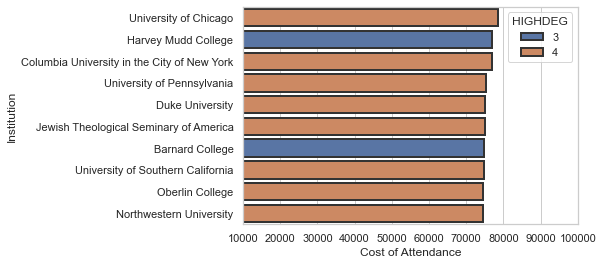

In [8]:
# Bar Plot- plotting top 10 most expensive institutions

top10high = master_df.nlargest(n=10, columns=["COSTT4_A"])

fig, ax = plt.subplots()
sns.barplot(data=top10high, ax=ax,y="INSTNM", x="COSTT4_A", hue="HIGHDEG", dodge=False, linewidth=2.0, 
            errcolor=".1", edgecolor=".2")
ax.set_ylabel("Institution")
ax.set_xlabel("Cost of Attendance")
ax.set_xlim(10000, 100000)

- 8 of the 10 most expensive universities primarily confer graduate degrees
- 2 of the 10 most expensive universities primarily confer undergraduate degrees

Text(0.5, 0, 'Cost of Attendance')

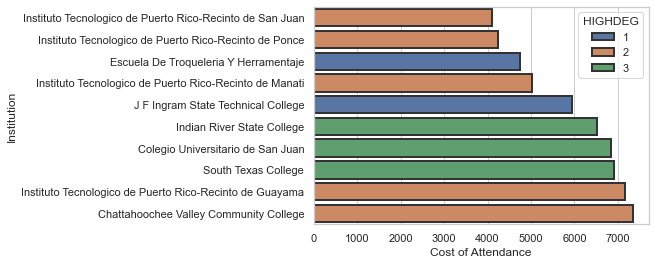

In [9]:
top10low = master_df.nsmallest(n=10, columns=["COSTT4_A"])

fig, ax = plt.subplots()
sns.barplot(data=top10low, ax=ax,y="INSTNM", x="COSTT4_A", hue="HIGHDEG", dodge=False, linewidth=2.0, 
            errcolor=".1", edgecolor=".2")
ax.set_ylabel("Institution")
ax.set_xlabel("Cost of Attendance")

- 3/10 institutions confer a bachelors degree
- Half confer an associates degree
- 2/10 confer certificates

- For the rest of the analysis, programs that primarily confer certificates will be dropped
- Let's also drop universities from Puerto Rico

In [10]:
# Select entries that have a STABBR that is not equal to PR
top10low = master_df.nsmallest(n=15, columns=["COSTT4_A"])
top10low = top10low[top10low["STABBR"] != "PR"]
top10low

,UNITID,INSTNM,STABBR,ZIP,CITY,ICLEVEL,HIGHDEG,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT
23,101471,J F Ingram State Technical College,AL,36022,Deatsville,2,1,5940.0,5400.0,5400.0
464,134608,Indian River State College,FL,34981-5596,Fort Pierce,1,3,6525.0,2764.0,10201.0
2892,409315,South Texas College,TX,78502-9701,McAllen,1,3,6912.0,4140.0,7830.0
10,101028,Chattahoochee Valley Community College,AL,36869,Phenix City,2,2,7338.0,4860.0,8790.0
2808,262031,St Charles Community College,MO,63376-0975,Cottleville,2,2,7364.0,2880.0,5520.0
1288,177870,Lake Career and Technical Center,MO,65020,Camdenton,3,1,7675.0,4850.0,4850.0
1249,176008,Mississippi Delta Community College,MS,38761,Moorhead,2,2,7828.0,3085.0,5285.0
1808,199892,Wayne Community College,NC,27534-8002,Goldsboro,2,2,7834.0,2524.0,8668.0


In [11]:
# Select only universities with High degree over 1
master_df = master_df[master_df["HIGHDEG"] > 1]
master_df.head()

,UNITID,INSTNM,STABBR,ZIP,CITY,ICLEVEL,HIGHDEG,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT
0,100654,Alabama A & M University,AL,35762,Normal,1,4,23053.0,10024.0,18634.0
1,100663,University of Alabama at Birmingham,AL,35294-0110,Birmingham,1,4,24495.0,8568.0,20400.0
2,100690,Amridge University,AL,36117-3553,Montgomery,1,4,14800.0,6950.0,6950.0
3,100706,University of Alabama in Huntsville,AL,35899,Huntsville,1,4,23917.0,11122.0,23518.0
4,100724,Alabama State University,AL,36104-0271,Montgomery,1,4,21866.0,11068.0,19396.0


Text(0.5, 0, 'Cost of Attendance')

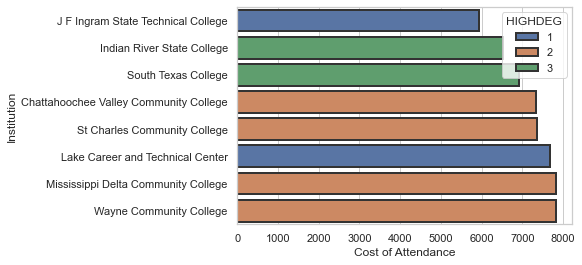

In [12]:
fig, ax = plt.subplots()
sns.barplot(data=top10low, ax=ax,y="INSTNM", x="COSTT4_A", hue="HIGHDEG", dodge=False, linewidth=2.0, 
            errcolor=".1", edgecolor=".2")
ax.set_ylabel("Institution")
ax.set_xlabel("Cost of Attendance")

In [13]:
# Grab subset of dataframe for only Washington State
WA = master_df[master_df["STABBR"] == "WA"]

# Order it by largest cost of tuition
top10WA = WA.nlargest(n=10, columns=["COSTT4_A"])

(10000.0, 80000.0)

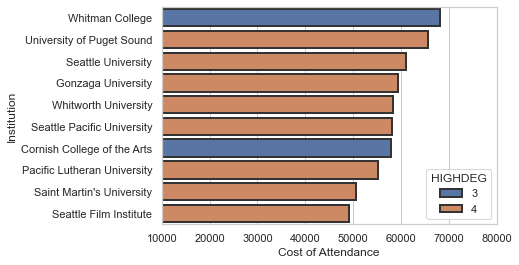

In [14]:
# Create Bar plot depicting top 10 most expensive unis in Washington State
fig, ax = plt.subplots()
sns.barplot(data=top10WA, ax=ax,y="INSTNM", x="COSTT4_A", hue="HIGHDEG", dodge=False, linewidth=2.0, 
            errcolor=".1", edgecolor=".2")
ax.set_ylabel("Institution")
ax.set_xlabel("Cost of Attendance")
ax.set_xlim(10000, 80000)

- Same trend as US bar plot

In [15]:
WA = WA[WA["HIGHDEG"] > 2]
#WA

Text(0.5, 0, 'Cost of Attendance')

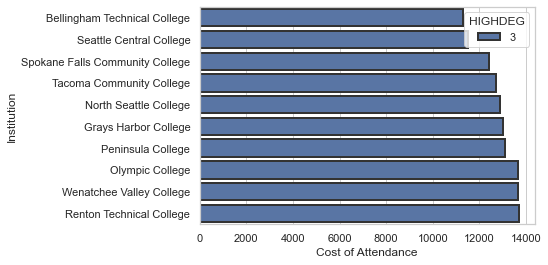

In [16]:
WA_low = WA.nsmallest(n=10, columns=["COSTT4_A"])

fig, ax = plt.subplots()
sns.barplot(data=WA_low, ax=ax,y="INSTNM", x="COSTT4_A", hue="HIGHDEG", dodge=False, linewidth=2.0, 
            errcolor=".1", edgecolor=".2")
ax.set_ylabel("Institution")
ax.set_xlabel("Cost of Attendance")
#ax.set_xlim(10000, 80000)

In [17]:
WA.sort_values(by="COSTT4_A", ascending=False, inplace=True)

Text(0.5, 0, 'Cost of Attendance')

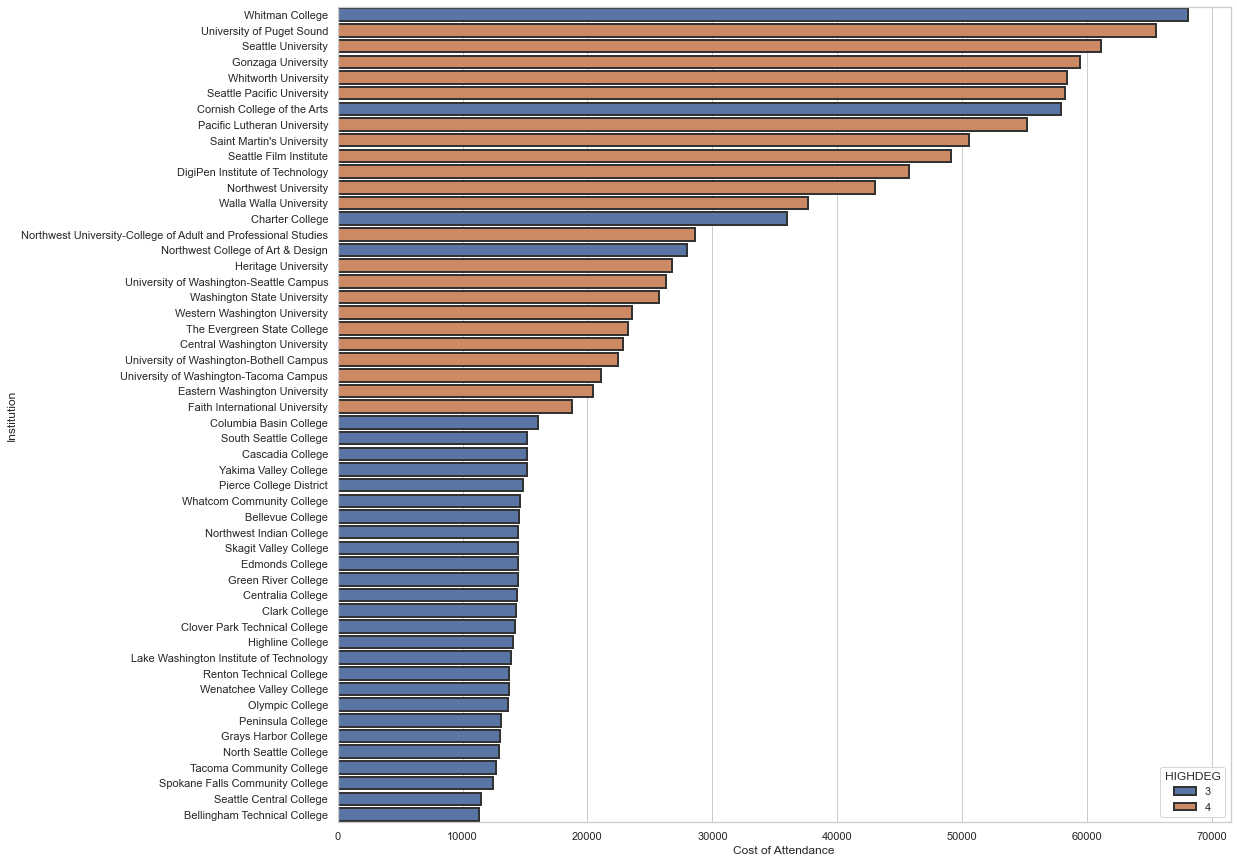

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 15)
sns.barplot(data=WA, ax=ax,y="INSTNM", x="COSTT4_A", hue="HIGHDEG", dodge=False, linewidth=2.0, 
            errcolor=".1", edgecolor=".2")
ax.set_ylabel("Institution")
ax.set_xlabel("Cost of Attendance")
#ax.set_xlim(10000, 80000)

# Next, lets visualize the cost breakdown as an interactive map with plotly

  Using cached plotly-5.6.0-py2.py3-none-any.whl (27.7 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
  Using cached cufflinks-0.17.3.tar.gz (81 kB)
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67921 sha256=dd7810134bf984a70ccb8633f70350146b16562fd01deeb32829a26712bd841d
  Stored in directory: /Users/jonathjd/Library/Caches/pip/wheels/6b/76/62/6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [21]:
# New dataframe containing all 50 states with the mean and median price of attending a 4 year university
# For this we will include insitutions that confer both a graduate and bachelors degree

master_df

,UNITID,INSTNM,STABBR,ZIP,CITY,ICLEVEL,HIGHDEG,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT
0,100654,Alabama A & M University,AL,35762,Normal,1,4,23053.0,10024.0,18634.0
1,100663,University of Alabama at Birmingham,AL,35294-0110,Birmingham,1,4,24495.0,8568.0,20400.0
2,100690,Amridge University,AL,36117-3553,Montgomery,1,4,14800.0,6950.0,6950.0
3,100706,University of Alabama in Huntsville,AL,35899,Huntsville,1,4,23917.0,11122.0,23518.0
4,100724,Alabama State University,AL,36104-0271,Montgomery,1,4,21866.0,11068.0,19396.0
...,...,...,...,...,...,...,...,...,...,...
3354,493798,New York Seminary,NY,11218-5611,Brooklyn,2,2,19545.0,11200.0,11200.0
3356,494171,Arizona College of Nursing-Tempe,AZ,85282-1840,Tempe,1,3,35130.0,19962.0,19962.0
3357,494436,Fortis Institute-Cookeville,TN,38501-4305,Cookeville,2,2,26919.0,15304.0,15304.0
3359,494843,Fortis College-Landover,MD,20785-2223,Landover,2,2,28157.0,15061.0,15061.0
